In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import rasterio
import numpy as np

In [2]:
def load_rgb_and_meta(filepath):
    """
    Loads a 3-band (RGB) Landsat 8 raster image, applies percentile stretch for visualisation,
    and extracts spatial extent and coordinate reference system (CRS).

    Parameters:
        filepath (str): Path to the raster file.

    Returns:
        tuple: (normalised RGB image as np.array, extent list [left, right, bottom, top], raster CRS)
    """
    with rasterio.open(filepath) as src:
        r = src.read(1).astype(np.float32)
        g = src.read(2).astype(np.float32)
        b = src.read(3).astype(np.float32)

        rgb = np.stack([r, g, b], axis=-1)

        # Percentile stretch
        p2 = np.percentile(rgb, 2)
        p98 = np.percentile(rgb, 98)
        rgb = (rgb - p2) / (p98 - p2)
        rgb = np.clip(rgb, 0, 1)

        # Get extent (left, right, bottom, top)
        bounds = src.bounds
        extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

        return rgb, extent, src.crs

In [3]:
# Load Landsat images (downloaded using figure1-data.ipynb via Google Earth Engine and cropped to the area of interest)
rgb1_1990, extent_1990, crs_1990 = load_rgb_and_meta("Figures/Data/Landsat/LT05_19900616.tif")
rgb2_1990, extent_1990, crs_1990 = load_rgb_and_meta("Figures/Data/Landsat/LT05_19900801.tif")
rgb3_1990, extent_1990, crs_1990 = load_rgb_and_meta("Figures/Data/Landsat/LT05_19900803.tif")
rgb4_1990, extent_1990, crs_1990 = load_rgb_and_meta("Figures/Data/Landsat/LT05_19900817.tif")

rgb1_2014, extent_2014, crs_2014 = load_rgb_and_meta("Figures/Data/Landsat/LC08_20140628.tif")
rgb2_2014, extent_2014, crs_2014 = load_rgb_and_meta("Figures/Data/Landsat/LC08_20140707.tif")
rgb3_2014, extent_2014, crs_2014 = load_rgb_and_meta("Figures/Data/Landsat/LC08_20140815.tif")
rgb4_2014, extent_2014, crs_2014 = load_rgb_and_meta("Figures/Data/Landsat/LC08_20140826.tif")


In [ ]:
# # Load Landsat images (downloaded using figure1-data.ipynb via Google Earth Engine and cropped to the area of interest)
# rgb1_1990, extent_1990, crs_1990 = load_rgb_and_meta("Figures/Data/Landsat/LT05_19900616_EPSG3413.tif")
# rgb2_1990, extent_1990, crs_1990 = load_rgb_and_meta("Figures/Data/Landsat/LT05_19900801_EPSG3413.tif")
# rgb3_1990, extent_1990, crs_1990 = load_rgb_and_meta("Figures/Data/Landsat/LT05_19900803_EPSG3413.tif")
# rgb4_1990, extent_1990, crs_1990 = load_rgb_and_meta("Figures/Data/Landsat/LT05_19900817_EPSG3413.tif")


# rgb1_2014, extent_2014, crs_2014 = load_rgb_and_meta("Figures/Data/Landsat/LC08_20140628_EPSG3413.tif")
# rgb2_2014, extent_2014, crs_2014 = load_rgb_and_meta("Figures/Data/Landsat/LC08_20140707_EPSG3413.tif")
# rgb3_2014, extent_2014, crs_2014 = load_rgb_and_meta("Figures/Data/Landsat/LC08_20140815_EPSG3413.tif")
# rgb4_2014, extent_2014, crs_2014 = load_rgb_and_meta("Figures/Data/Landsat/LC08_20140826_EPSG3413.tif")


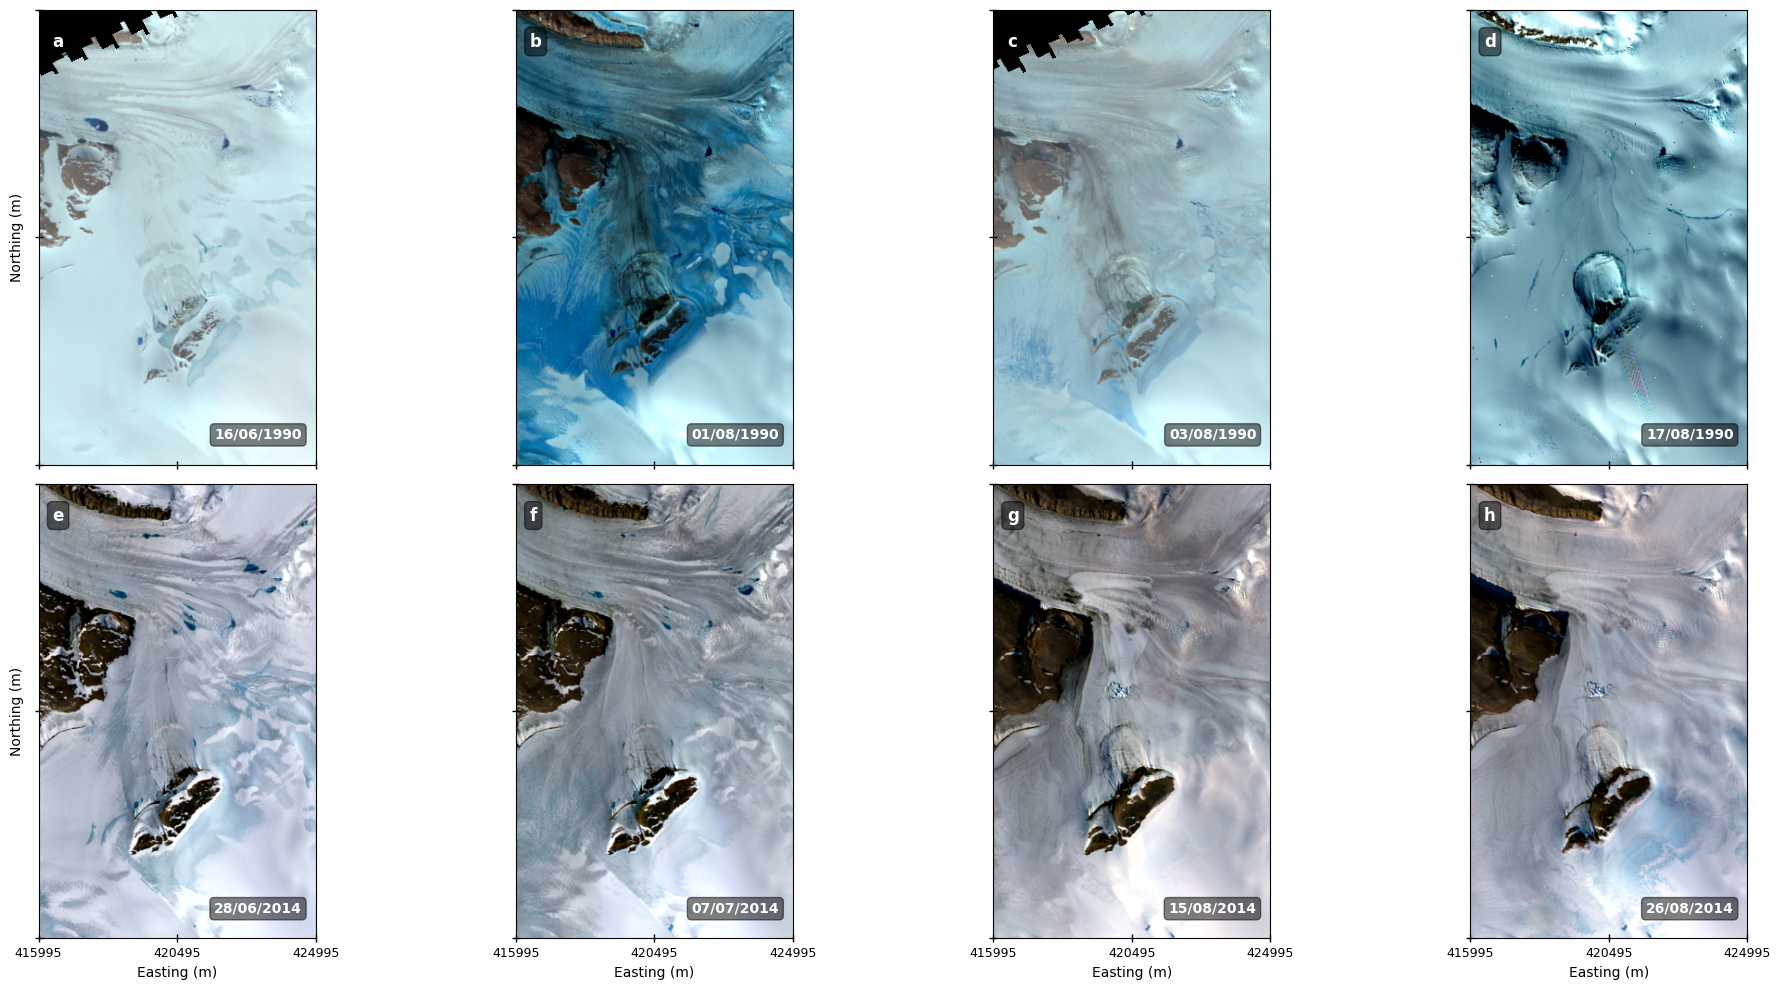

In [4]:
landsat_1990_images = [rgb1_1990, rgb2_1990, rgb3_1990, rgb4_1990]
landsat_2014_images = [rgb1_2014, rgb2_2014, rgb3_2014, rgb4_2014]

# Dates or labels for each image
dates_1990 = ["16/06/1990", "01/08/1990", "03/08/1990", "17/08/1990"]
dates_2014 = ["28/06/2014", "07/07/2014", "15/08/2014", "26/08/2014"]

fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)

for row, (images, dates, extent) in enumerate(zip([landsat_1990_images, landsat_2014_images],
                                                 [dates_1990, dates_2014],
                                                 [extent_1990, extent_2014])):
    for col, (img, date) in enumerate(zip(images, dates)):
        ax = axs[row, col]
        ax.imshow(img, extent=extent, origin='upper')

        # Set ticks with no offset
        ax.set_xticks([extent[0], (extent[0]+extent[1])/2, extent[1]])
        ax.set_yticks([extent[2], (extent[2]+extent[3])/2, extent[3]])
        ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        ax.tick_params(axis='both', direction='inout', length=6, width=1, labelsize=9)

        # Axis labels only on left and bottom edges
        if col == 0:
            ax.set_ylabel("Northing (m)", fontsize=10)
        else:
            ax.set_yticklabels([])

        if row == 1:
            ax.set_xlabel("Easting (m)", fontsize=10)
        else:
            ax.set_xticklabels([])

        # Add date label top-right corner
        ax.text(0.95, 0.05, date, fontsize=10, fontweight='bold',
                ha='right', va='bottom', color='white',
                transform=ax.transAxes,
                bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

        # Add subplot label (a-h)
        subplot_label = chr(ord('a') + row*4 + col)
        ax.text(0.05, 0.95, subplot_label, fontsize=12, fontweight='bold',
                ha='left', va='top', color='white',
                transform=ax.transAxes,
                bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()
